## Plug-ins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

## Reading Dataset

In [2]:
# Read and prepare dataset
df_house = pd.read_csv('/kaggle/input/house-prices-prediction-dataset/Real estate (1) (1).csv')
# Defining Features and Targets
features_house = ['X2 house age', 'X3 distance to the nearest MRT station']
target_house = 'Y house price of unit area'

## Data Preparation

In [3]:
X_house = df_house[features_house]
y_house = df_house[target_house]

## Splitting data into Training and Testing sets

In [4]:
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

## Training Linear Regression Model

In [5]:
model_house = LinearRegression()
model_house.fit(X_house_train, y_house_train)

LinearRegression()

## Making Predictions

In [6]:
y_house_pred = model_house.predict(X_house_test)

## Model Evaluation

In [7]:
mse_house = mean_squared_error(y_house_test, y_house_pred)
r2_house = r2_score(y_house_test, y_house_pred)

# display metrics
print("\nHouse Price Prediction Model Performance:")
print(f"Mean Squared Error (MSE): {mse_house:.2f}")
print(f"R-squared (R²): {r2_house:.2f}")


House Price Prediction Model Performance:
Mean Squared Error (MSE): 71.21
R-squared (R²): 0.58


## Creating a Scatterplot

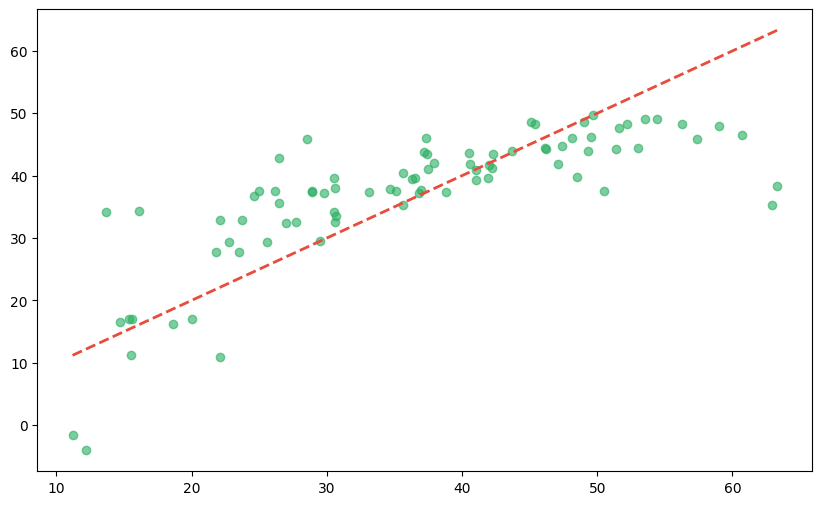

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_house_test, y_house_pred, alpha=0.6, color='#27ae60', label='Predicted vs. Actual')
plt.plot([y_house_test.min(), y_house_test.max()], [y_house_test.min(), y_house_test.max()],
         color='#e74c3c', linestyle='--', linewidth=2, label='Ideal Prediction')

## Calculating and Plotting Regression Line

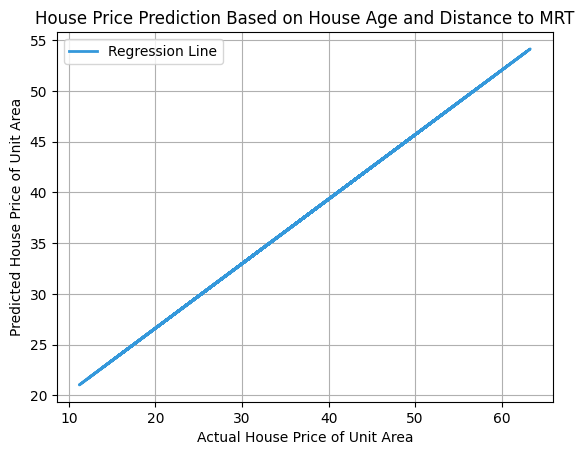

In [9]:
m_house, b_house = np.polyfit(y_house_test, y_house_pred, 1)
plt.plot(y_house_test, m_house * y_house_test + b_house, color='#3498db', linewidth=2, label='Regression Line')

plt.xlabel('Actual House Price of Unit Area')
plt.ylabel('Predicted House Price of Unit Area')
plt.title('House Price Prediction Based on House Age and Distance to MRT')
plt.legend()
plt.grid(True)
plt.show()